<a href="https://colab.research.google.com/github/myllanes/ECGR4105M.Y/blob/main/MichaelYllanes_801299358_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [583]:
#Michael Yllanes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/myllanes/ECGR4105M.Y./main/Housing.csv', na_values='*')

display(data)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Initialization

In [584]:
#Create a matrix with a dimension of m by 1. m is the number of observations
m = data.area.size
X_0 = np.ones((m, 1))
X_0 = pd.DataFrame(X_0)
data.insert(0, "X0",X_0)


In [585]:
# This will compute the cost when given values
def computeCost(X,y,theta):
  m = len(X)
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)
  return J


In [586]:
#This is a gradient descent algorithm used to optimize values

def gradientDescent(X, y, theta, alpha, iterations):

  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = computeCost(X, y, theta)
  return theta, cost_history

# Problem 1


# 1a
Input: area, bedrooms, bathrooms, stories, parking

In [587]:
#Setting up variables
X = data.loc[:,['X0','area','bedrooms','bathrooms','stories','parking']]
y = data.price
theta = np.zeros(6)
iterations = 200;
alpha = 0.00000001;

#Calling gradient_decsent function for X
Xarray = X.loc[:,['X0','area','bedrooms','bathrooms','stories','parking']].values
yarray = y.values
thetaNew, cost_history = gradientDescent(Xarray, yarray, theta, alpha, iterations)
print('Value of theta =', thetaNew)


# Print the linear model
print("Linear model:")
print("y_bar =", thetaNew[0], "+", thetaNew[1], "* area +", thetaNew[2], "* bedrooms +", thetaNew[3], "* bathrooms +", thetaNew[4], "* stories +", thetaNew[5], "* parking")

val_predictions = Xarray.dot(thetaNew)
val_errors = np.subtract(val_predictions, yarray)
val_sqrErrors = np.square(val_errors)
val_loss = 1 / (2 * len(Xarray)) * np.sum(val_sqrErrors)


Value of theta = [8.59847467e-01 8.55707007e+02 3.15074410e+00 1.72174325e+00
 2.64943561e+00 7.23637929e-01]
Linear model:
y_bar = 0.8598474671789083 + 855.7070073424824 * area + 3.15074409664459 * bedrooms + 1.7217432516052396 * bathrooms + 2.6494356059350754 * stories + 0.7236379286036609 * parking


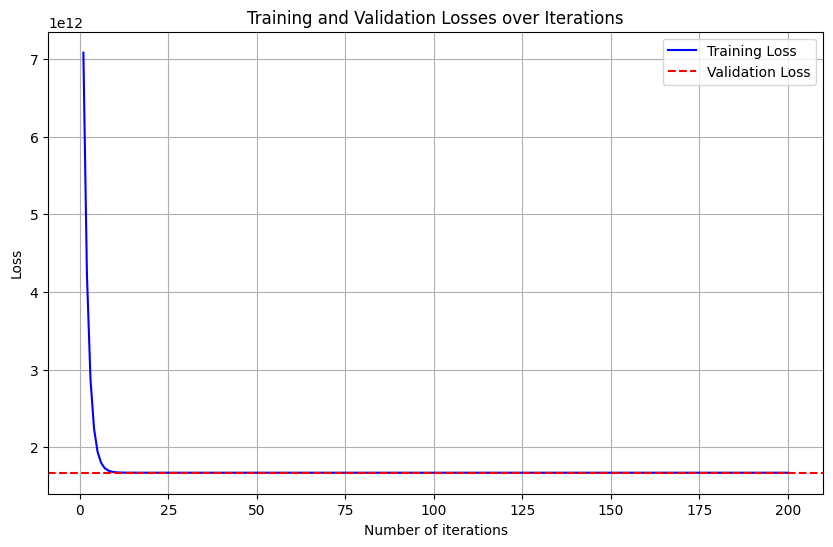

In [588]:
#Loss over iteration graph Plot
plt.plot(range(1, iterations + 1),cost_history, color='blue', label='Training Loss')
plt.axhline(y=val_loss, color='red', linestyle='--', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses over Iterations')
plt.legend()

In [589]:
# Splitting the dataset into the Training set and Validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .90, random_state = 5000)

In [590]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [591]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 5000)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=5000)

In [592]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [593]:
# Performance
print('Training Accuracy:', classifier.score(X_train,y_train))
print('Test Accuracy:', classifier.score(X_test,y_test))

Training Accuracy: 0.6296296296296297
Test Accuracy: 0.010183299389002037


# 1b
Input: Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [594]:
# Convert yes and no to 1 and 0
mapping = {'yes': 1, 'no': 0}
data = data.replace(mapping)


In [595]:
#Variable
X2 = data.loc[:,['X0','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y2 = data.price
theta2 = np.zeros(12)
iterations2 = 200;
alpha2 = 0.00000001;

# Gradient_decsent function
Xarray2 = X2.loc[:,['X0','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
yarray2 = y2.values
thetaNew2, cost_history2 = gradientDescent(Xarray2, yarray2, theta2, alpha2, iterations2)
print('Value of theta =', thetaNew2)

# Linear model
print("Linear model:")
print("y_bar =", thetaNew2[0], "+", thetaNew2[1], "* area +", thetaNew2[2], "* bedrooms +", thetaNew2[3], "* bathrooms +", thetaNew2[4], "* stories +", thetaNew2[5], "* mainroad +", thetaNew2[6], "* guestroom", thetaNew2[7], "* basement +", thetaNew2[8], "* hotwaterheating +", thetaNew2[9], "* airconditioning +", thetaNew2[10], "* parking +", thetaNew2[11], "* prefarea")

val_predictions2 = Xarray2.dot(thetaNew2)
val_errors2 = np.subtract(val_predictions2, yarray2)
val_sqrErrors2 = np.square(val_errors2)
val_loss2 = 1 / (2 * len(Xarray2)) * np.sum(val_sqrErrors2)

Value of theta = [8.59847313e-01 8.55706797e+02 3.15074362e+00 1.72174303e+00
 2.64943528e+00 7.57488526e-01 3.22380377e-01 5.52295485e-01
 1.19265738e-01 6.80760189e-01 7.23637843e-01 3.61040061e-01]
Linear model:
y_bar = 0.8598473126557249 + 855.7067966091062 * area + 3.150743618588242 * bedrooms + 1.7217430344222744 * bathrooms + 2.6494352762782203 * stories + 0.7574885257530577 * mainroad + 0.32238037673726627 * guestroom 0.552295485312596 * basement + 0.11926573751726635 * hotwaterheating + 0.6807601892664543 * airconditioning + 0.7236378429869456 * parking + 0.36104006114385034 * prefarea


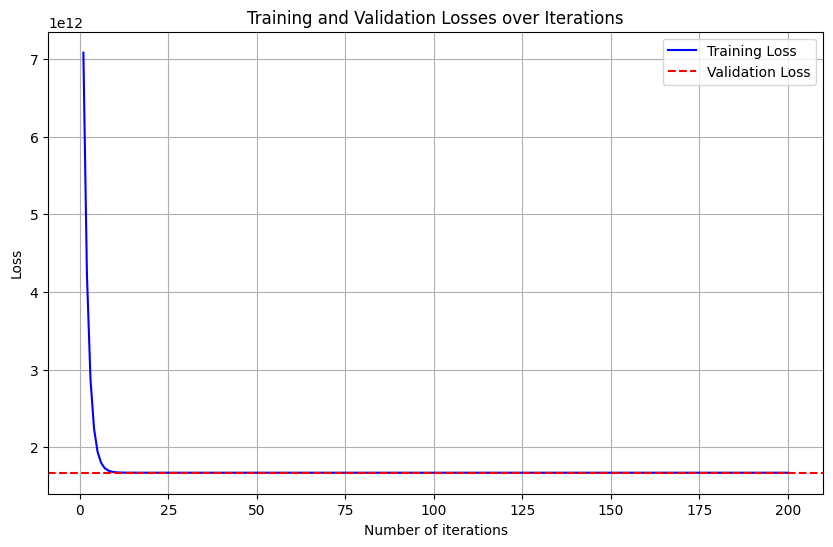

In [596]:
#plot loss over iteration graph
plt.plot(range(1, iterations2 + 1),cost_history2, color='blue', label='Training Loss')
plt.axhline(y=val_loss2, color='red', linestyle='--', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Losses over Iterations')
plt.legend()

In [597]:
# Splitting the dataset into the Training set and Validation set
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.65, random_state = 0)

In [598]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
X_train2 = sc2.fit_transform(X_train2)
X_test2 = sc2.transform(X_test2)

In [599]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train2, y_train2)

LogisticRegression(random_state=0)

In [600]:
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test2)

In [601]:
# Performance
print('Training Accuracy:', classifier2.score(X_train2,y_train2))
print('Test Accuracy:', classifier2.score(X_test2,y_test2))

Training Accuracy: 0.5684210526315789
Test Accuracy: 0.02535211267605634


# Problem 2


# 2a

In [602]:
X3 = data.loc[:,['area','bedrooms','bathrooms','stories','parking']]

# finding mean and standard deviation
mean_std = X3.mean()
std_std = X3.std()

# Calculate minimum and maximum values for normalization
min_norm = X3.min()
max_norm = X3.max()

# Apply normalization using formulas
data_norm = (X3 - min_norm) / (max_norm - min_norm)

# Apply standardization using formulas
data_std = (X3 - mean_std) / std_std



# 2a Normalization


In [603]:
# Create a matrix with a dimension of m by 1.
m = data_norm.area.size
X_0 = np.ones((m, 1))
X_0 = pd.DataFrame(X_0)
data_norm.insert(0, "X0",X_0)


In [604]:
# Variables for normalization
X3 = data_norm.loc[:,['X0','area','bedrooms','bathrooms','stories','parking']]
y3 = data.price
theta3 = np.zeros(6)
iterations3 = 1000;
alpha3 = 0.1;

# Gradient_decsent function
Xarray3 = X3.loc[:,['X0','area','bedrooms','bathrooms','stories','parking']].values
yarray3 = y3.values
thetaNew3, cost_history3 = gradientDescent(Xarray3, yarray3, theta3, alpha3, iterations3)
print('Value of theta =', thetaNew3)

# Print linear model
print("Linear model:")
print("y_bar =", thetaNew3[0], "+", thetaNew3[1], "* area +", thetaNew3[2], "* bedrooms +", thetaNew3[3], "* bathrooms +", thetaNew3[4], "* stories +", thetaNew3[5], "* parking")

val_predictions3 = Xarray3.dot(thetaNew3)
val_errors3 = np.subtract(val_predictions3, yarray3)
val_sqrErrors3 = np.square(val_errors3)
val_loss3 = 1 / (2 * len(Xarray3)) * np.sum(val_sqrErrors3)

Value of theta = [2263008.41188496 4239280.60988514 1129663.536501   3162760.57154492
 1654745.3433725  1274130.24120347]
Linear model:
y_bar = 2263008.411884965 + 4239280.609885144 * area + 1129663.5365010006 * bedrooms + 3162760.5715449154 * bathrooms + 1654745.3433724951 * stories + 1274130.2412034692 * parking


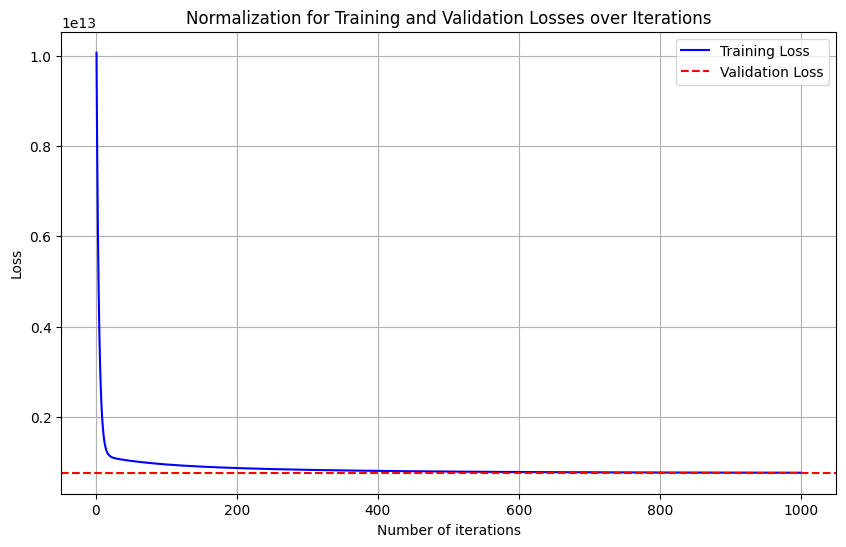

In [605]:
# Plot loss over iteration
plt.plot(range(1, iterations3 + 1),cost_history3, color='blue', label='Training Loss')
plt.axhline(y=val_loss3, color='red', linestyle='--', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Normalization for Training and Validation Losses over Iterations')
plt.legend()

In [606]:
# Splitting the dataset into the Training set and Validation set
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.65, random_state = 0)

In [607]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc3 = StandardScaler()
X_train3 = sc3.fit_transform(X_train3)
X_test3 = sc3.transform(X_test3)

In [608]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier3 = LogisticRegression(random_state = 5000)
classifier3.fit(X_train3, y_train3)

LogisticRegression(random_state=5000)

In [609]:
# Predicting the Test set results
y_pred3 = classifier3.predict(X_test3)

In [610]:
print('Training Accuracy:', classifier3.score(X_train3,y_train3))
print('Test Accuracy:', classifier3.score(X_test3,y_test3))

Training Accuracy: 0.20526315789473684
Test Accuracy: 0.022535211267605635


# 2a Standardization

In [611]:
# Create a matrix with a dimension of m by 1
m = data_std.area.size
X_0 = np.ones((m, 1))
X_0 = pd.DataFrame(X_0)
data_std.insert(0, "X0",X_0)


In [612]:
# Variables for Standardization
X4 = data_std.loc[:,['X0','area','bedrooms','bathrooms','stories','parking']]
y4 = data.price
theta4 = np.zeros(6)
iterations4 = 1000;
alpha4 = 0.01;

# Gradient_decsent function
Xarray4 = X4.loc[:,['X0','area','bedrooms','bathrooms','stories','parking']].values
yarray4 = y4.values
thetaNew4, cost_history4 = gradientDescent(Xarray4, yarray4, theta4, alpha4, iterations4)
print('Value of theta =', thetaNew4)

# Print the Linear model
print("Linear model:")
print("y_bar =", thetaNew4[0], "+", thetaNew4[1], "* area +", thetaNew4[2], "* bedrooms +", thetaNew4[3], "* bathrooms +", thetaNew4[4], "* stories +", thetaNew4[5], "* parking")

val_predictions4 = Xarray4.dot(thetaNew4)
val_errors4 = np.subtract(val_predictions4, yarray4)
val_sqrErrors4 = np.square(val_errors4)
val_loss4 = 1 / (2 * len(Xarray4)) * np.sum(val_sqrErrors4)

Value of theta = [4766523.46205873  718286.4927966   124654.9800911   569392.31639344
  474812.57292731  325531.09543828]
Linear model:
y_bar = 4766523.46205873 + 718286.4927965978 * area + 124654.98009109819 * bedrooms + 569392.3163934374 * bathrooms + 474812.5729273103 * stories + 325531.09543827636 * parking


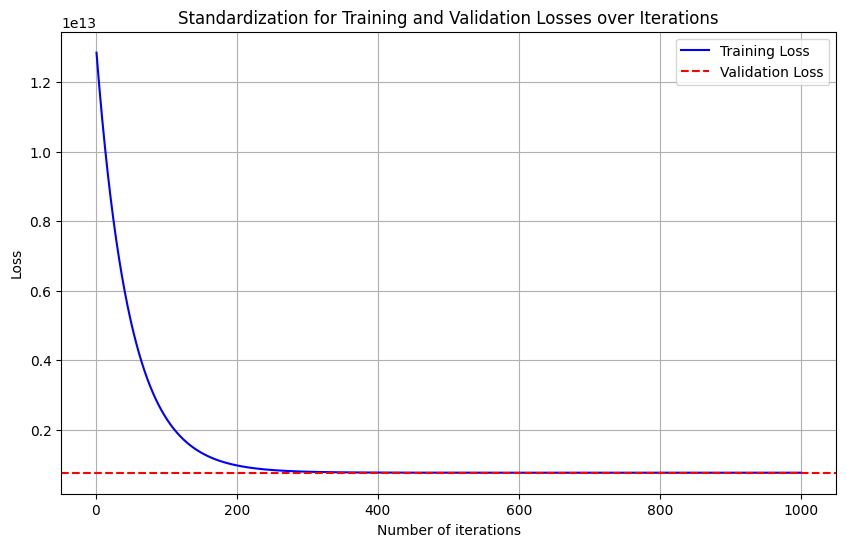

In [613]:
plt.plot(range(1, iterations4 + 1),cost_history4, color='blue', label='Training Loss')
plt.axhline(y=val_loss4, color='red', linestyle='--', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Standardization for Training and Validation Losses over Iterations')
plt.legend()

In [614]:
# Splitting the dataset into the Training set and Validation set
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size = 0.90, random_state = 5000)

In [615]:
# Feature Scaling
sc4 = StandardScaler()
X_train4 = sc4.fit_transform(X_train4)
X_test4 = sc4.transform(X_test4)

In [616]:
# Fitting Logistic Regression to the Training set
classifier4 = LogisticRegression(random_state = 5000)
classifier4.fit(X_train4, y_train4)

LogisticRegression(random_state=5000)

In [617]:
# Predicting the Test set results
y_pred4 = classifier4.predict(X_test4)

In [618]:
print('Training Accuracy:', classifier4.score(X_train4,y_train4))
print('Test Accuracy:', classifier4.score(X_test4,y_test4))

Training Accuracy: 0.6296296296296297
Test Accuracy: 0.010183299389002037


#2a Summary
My taining accuracy is about the same for both Standard and Normalization while the plot for Normalization is more steeper than Standardization. As for the accuracy from its about the same. Standarization achieve the best result due its graph being more wider.


# 2b

In [619]:
X6 = data.loc[:,['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]

# finding mean and standard deviation
mean_std2 = X6.mean()
std_std2 = X6.std()

# Calculate minimum and maximum values for normalization
min_norm2 = X6.min()
max_norm2 = X6.max()

# Apply normalization using formulas
data_norm2 = (X6 - min_norm2) / (max_norm2 - min_norm2)

# Apply standardization using formulas
data_std2 = (X6 - mean_std2) / std_std2


# 2b Normalization

In [620]:
# Create a matrix with a dimension of m by 1.
m = data_norm2.area.size
X_0 = np.ones((m, 1))
X_0 = pd.DataFrame(X_0)
data_norm2.insert(0, "X0",X_0)

In [621]:
#Variable for normalization
X6 = data_norm2.loc[:,['X0','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y6 = data.price
theta6 = np.zeros(12)
iterations6 = 1000;
alpha6 = 0.01;

# Gradient_decsent function
Xarray6 = X6.loc[:,['X0','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
yarray6 = y6.values
thetaNew6, cost_history6 = gradientDescent(Xarray6, yarray6, theta6, alpha6, iterations6)
print('Value of theta =', thetaNew6)

# Linear model
print("Linear model:")
print("y_bar =", thetaNew6[0], "+", thetaNew6[1], "* area +", thetaNew6[2], "* bedrooms +", thetaNew6[3], "* bathrooms +", thetaNew6[4], "* stories +", thetaNew6[5], "* mainroad +", thetaNew6[6], "* guestroom", thetaNew6[7], "* basement +", thetaNew6[8], "* hotwaterheating +", thetaNew6[9], "* airconditioning +", thetaNew6[10], "* parking +", thetaNew6[11], "* prefarea")

val_predictions6 = Xarray6.dot(thetaNew6)
val_errors6 = np.subtract(val_predictions6, yarray6)
val_sqrErrors6 = np.square(val_errors6)
val_loss6 = 1 / (2 * len(Xarray6)) * np.sum(val_sqrErrors6)

Value of theta = [1783939.904875   1061221.88516175 1042650.16840117 1002778.99367125
 1195628.40600456 1076427.89508833  430333.47669295  422477.44640846
  429146.35973809 1096839.63821529  989945.9800584   690133.67929318]
Linear model:
y_bar = 1783939.9048750012 + 1061221.8851617533 * area + 1042650.1684011683 * bedrooms + 1002778.9936712494 * bathrooms + 1195628.4060045644 * stories + 1076427.895088331 * mainroad + 430333.47669295076 * guestroom 422477.4464084625 * basement + 429146.3597380908 * hotwaterheating + 1096839.6382152943 * airconditioning + 989945.9800583972 * parking + 690133.6792931812 * prefarea


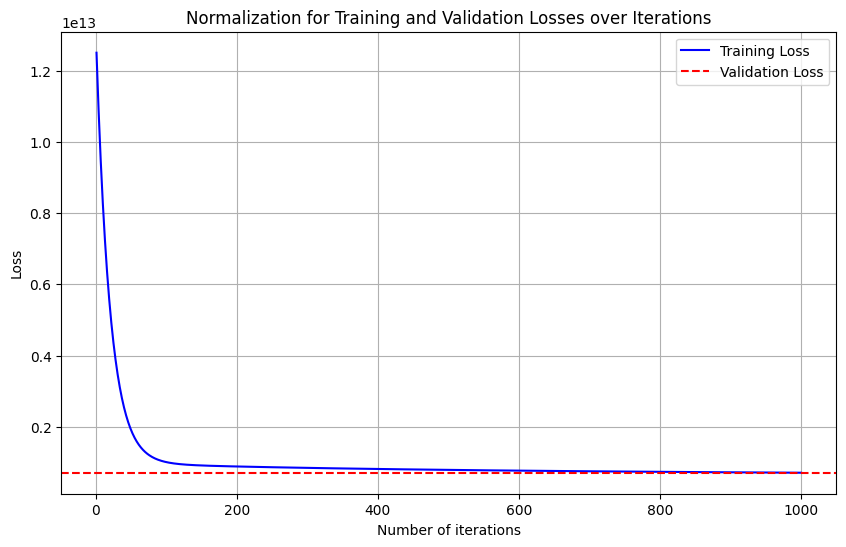

In [622]:
plt.plot(range(1, iterations6 + 1),cost_history6, color='blue', label='Training Loss')
plt.axhline(y=val_loss6, color='red', linestyle='--', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Normalization for Training and Validation Losses over Iterations')
plt.legend()

In [623]:
# Splitting the dataset into the Training set and Validation set
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size = 0.65, random_state = 0)

In [624]:
# Feature Scaling
sc6 = StandardScaler()
X_train6 = sc6.fit_transform(X_train6)
X_test6 = sc6.transform(X_test6)

In [625]:
# Fitting Logistic Regression to the Training set
classifier6 = LogisticRegression(random_state = 0)
classifier6.fit(X_train6, y_train6)

LogisticRegression(random_state=0)

In [626]:
# Predicting the Test set results
y_pred6 = classifier6.predict(X_test6)

In [628]:
# Performance
print('Training Accuracy:', classifier6.score(X_train6,y_train6))
print('Test Accuracy:', classifier6.score(X_test6,y_test6))

Training Accuracy: 0.5684210526315789
Test Accuracy: 0.02535211267605634


# 2b Standardization

In [629]:
# Create a matrix with a dimension of m by 1.
m = data_std2.area.size
X_0 = np.ones((m, 1))
X_0 = pd.DataFrame(X_0)
data_std2.insert(0, "X0",X_0)

In [630]:
#Variable for standardization
X7 = data_std2.loc[:,['X0','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y7 = data.price
theta7 = np.zeros(12)
iterations7 = 1000;
alpha7 = 0.01;

# Gradient_decsent function
Xarray7 = X7.loc[:,['X0','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
yarray7 = y7.values
thetaNew7, cost_history7 = gradientDescent(Xarray7, yarray7, theta7, alpha7, iterations7)
print('Value of theta =', thetaNew7)

# Linear model
print("Linear model:")
print("y_bar =", thetaNew7[0], "+", thetaNew7[1], "* area +", thetaNew7[2], "* bedrooms +", thetaNew7[3], "* bathrooms +", thetaNew7[4], "* stories +", thetaNew7[5], "* mainroad +", thetaNew7[6], "* guestroom", thetaNew7[7], "* basement +", thetaNew7[8], "* hotwaterheating +", thetaNew7[9], "* airconditioning +", thetaNew7[10], "* parking +", thetaNew7[11], "* prefarea")

val_predictions7 = Xarray7.dot(thetaNew7)
val_errors7 = np.subtract(val_predictions7, yarray7)
val_sqrErrors7 = np.square(val_errors7)
val_loss7 = 1 / (2 * len(Xarray7)) * np.sum(val_sqrErrors7)

Value of theta = [4766523.46205873  537599.64066288   96384.89254656  505483.36179403
  394695.16124381  163335.52522428  122243.39914718  180981.8393578
  188068.74196675  410051.44839317  257248.22311478  279353.41517291]
Linear model:
y_bar = 4766523.46205873 + 537599.6406628764 * area + 96384.89254656377 * bedrooms + 505483.36179402925 * bathrooms + 394695.1612438134 * stories + 163335.52522428424 * mainroad + 122243.39914717796 * guestroom 180981.839357796 * basement + 188068.7419667534 * hotwaterheating + 410051.448393169 * airconditioning + 257248.2231147816 * parking + 279353.4151729083 * prefarea


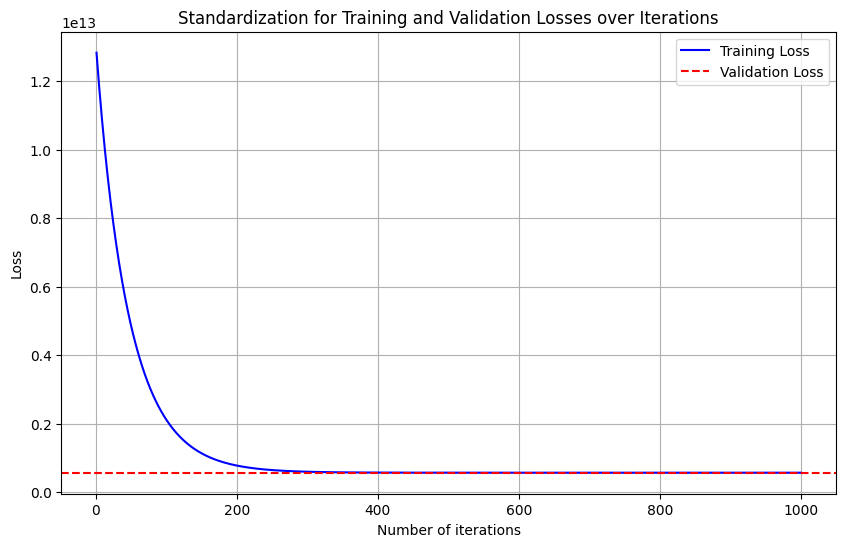

In [631]:
#plot loss over iteration graph
plt.plot(range(1, iterations7 + 1),cost_history7, color='blue', label='Training Loss')
plt.axhline(y=val_loss7, color='red', linestyle='--', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Standardization for Training and Validation Losses over Iterations')
plt.legend()

In [632]:
# Splitting the dataset into the Training set and Validation set
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size = 0.65, random_state = 0)

In [633]:
# Feature Scaling
sc7 = StandardScaler()
X_train7 = sc7.fit_transform(X_train7)
X_test7 = sc7.transform(X_test7)

In [634]:
# Fitting Logistic Regression to the Training set
classifier7 = LogisticRegression(random_state = 0)
classifier7.fit(X_train7, y_train7)

LogisticRegression(random_state=0)

In [635]:
# Predicting the Test set results
y_pred7 = classifier7.predict(X_test7)

In [636]:
print('Training Accuracy:', classifier7.score(X_train7,y_train7))
print('Test Accuracy:', classifier7.score(X_test7,y_test7))

Training Accuracy: 0.5684210526315789
Test Accuracy: 0.02535211267605634


# 2b Summary
Both Standardization and Normalization have about the same accuracy under the same conditions. For the accuracy from 1b it has a similar accuracy. For this part Stardardization achieves the best results as it has more of a curve then Normalization.

# Problem 3

In [721]:

def computeCost(X, y, theta, lambda_):
    m = len(X)
    predictions = np.dot(X, theta)
    squared_errors = np.square(predictions - y)
    regularization_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))  # Exclude theta[0] from regularization
    cost = (1 / (2 * m)) * np.sum(squared_errors) + regularization_term
    return cost

def gradientDescent(X, y, theta, alpha, iterations, lambda_):
    m = len(X)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        theta_reg = np.copy(theta)
        theta_reg[0] = 0  # Exclude regularization for theta[0] (bias)
        regularization_term = (lambda_ / m) * theta_reg
        gradient = (1 / m) * np.dot(X.T, errors) + regularization_term
        theta -= alpha * gradient
        cost_history[i] = computeCost(X, y, theta, lambda_)
    return theta, cost_history


# 3a Normalization

In [722]:
# Variables for normalization
X8 = data_norm.loc[:,['X0','area','bedrooms','bathrooms','stories','parking']]
y8 = data.price
theta8 = np.zeros(6)
iterations8 = 1000;
alpha8 = 0.01;

# Gradient_decsent function
Xarray8 = X8.loc[:,['X0','area','bedrooms','bathrooms','stories','parking']].values
yarray8 = y8.values
thetaNew8, cost_history8 = gradientDescent(Xarray8, yarray8, theta8, alpha8, iterations8,.1)
print('Value of theta =', thetaNew8)

# Print linear model
print("Linear model:")
print("y_bar =", thetaNew8[0], "+", thetaNew8[1], "* area +", thetaNew8[2], "* bedrooms +", thetaNew8[3], "* bathrooms +", thetaNew8[4], "* stories +", thetaNew8[5], "* parking")

val_predictions8 = Xarray8.dot(thetaNew8)
val_errors8 = np.subtract(val_predictions8, yarray8)
val_sqrErrors8 = np.square(val_errors8)
val_loss8 = 1 / (2 * len(Xarray8)) * np.sum(val_sqrErrors8)

Value of theta = [2969147.21953681 1634056.182311   1477856.04931411 1198230.453318
 1560671.31432472 1427909.34037864]
Linear model:
y_bar = 2969147.219536815 + 1634056.1823109982 * area + 1477856.049314108 * bedrooms + 1198230.4533179956 * bathrooms + 1560671.3143247196 * stories + 1427909.3403786388 * parking


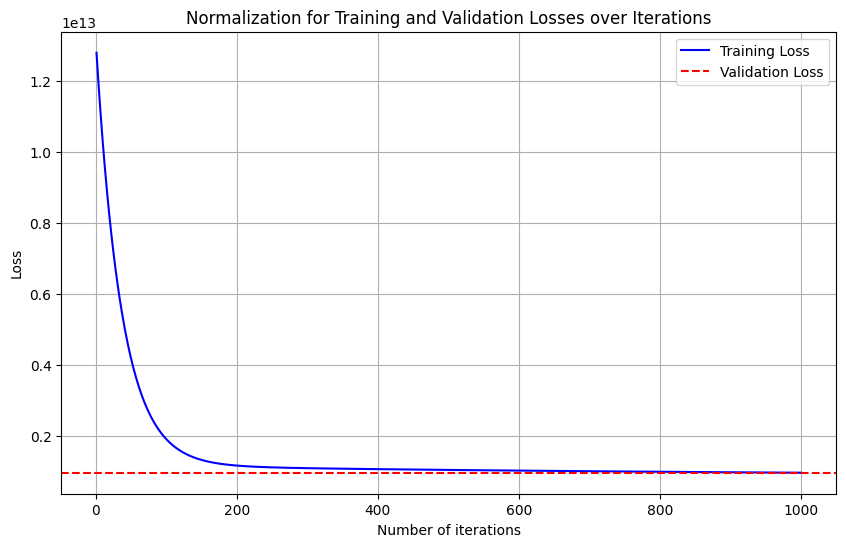

In [723]:
#plot loss over iteration graph
plt.plot(range(1, iterations8 + 1),cost_history8, color='blue', label='Training Loss')
plt.axhline(y=val_loss8, color='red', linestyle='--', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Normalization for Training and Validation Losses over Iterations')
plt.legend()

In [724]:
# Splitting the dataset into the Training set and Validation set
from sklearn.model_selection import train_test_split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size = 0.65, random_state = 0)

In [725]:
# Feature Scaling
sc8 = StandardScaler()
X_train8 = sc8.fit_transform(X_train8)
X_test8 = sc8.transform(X_test8)

In [726]:
# Fitting Logistic Regression to the Training set
classifier8 = LogisticRegression(random_state = 0)
classifier8.fit(X_train8, y_train8)

LogisticRegression(random_state=0)

In [727]:
# Predicting the Test set results
y_pred8 = classifier8.predict(X_test8)

In [728]:
print('Training Accuracy:', classifier3.score(X_train8,y_train8))
print('Test Accuracy:', classifier3.score(X_test8,y_test8))

Training Accuracy: 0.20526315789473684
Test Accuracy: 0.022535211267605635


# 3a standardization

In [729]:
# Variables for Standardization
X9 = data_std.loc[:,['X0','area','bedrooms','bathrooms','stories','parking']]
y9 = data.price
theta9 = np.zeros(6)
iterations9 = 1000;
alpha9 = 0.01;

# Gradient_decsent function
Xarray9 = X9.loc[:,['X0','area','bedrooms','bathrooms','stories','parking']].values
yarray9 = y9.values
thetaNew9, cost_history9 = gradientDescent(Xarray9, yarray9, theta9, alpha9, iterations9,.1)
print('Value of theta =', thetaNew9)

# Print linear model
print("Linear model:")
print("y_bar =", thetaNew9[0], "+", thetaNew9[1], "* area +", thetaNew9[2], "* bedrooms +", thetaNew9[3], "* bathrooms +", thetaNew9[4], "* stories +", thetaNew9[5], "* parking")

val_predictions9 = Xarray9.dot(thetaNew9)
val_errors9 = np.subtract(val_predictions9, yarray9)
val_sqrErrors9 = np.square(val_errors9)
val_loss9 = 1 / (2 * len(Xarray9)) * np.sum(val_sqrErrors9)

Value of theta = [4766523.46205873  718171.15211957  124708.71049529  569316.02430061
  474738.92976577  325521.12640431]
Linear model:
y_bar = 4766523.46205873 + 718171.1521195663 * area + 124708.71049528674 * bedrooms + 569316.0243006063 * bathrooms + 474738.92976577004 * stories + 325521.12640430935 * parking


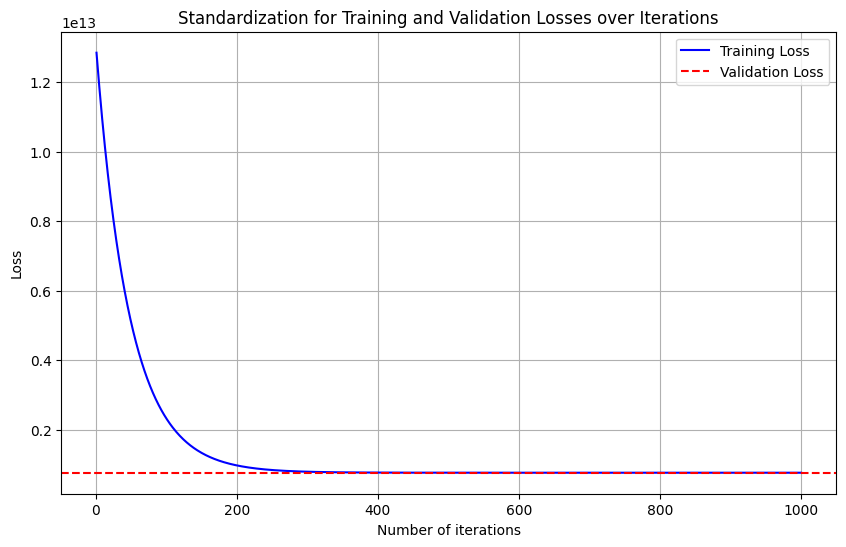

In [730]:
#plot loss over iteration graph
plt.plot(range(1, iterations9 + 1),cost_history9, color='blue', label='Training Loss')
plt.axhline(y=val_loss9, color='red', linestyle='--', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Standardization for Training and Validation Losses over Iterations')
plt.legend()

In [731]:
# Splitting the dataset into the Training set and Validation set
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size = 0.65, random_state = 0)

In [732]:
# Feature Scaling
sc9 = StandardScaler()
X_train9 = sc9.fit_transform(X_train9)
X_test9 = sc9.transform(X_test9)

In [733]:
# Fitting Logistic Regression to the Training set
classifier9 = LogisticRegression(random_state = 0)
classifier9.fit(X_train9, y_train9)

LogisticRegression(random_state=0)

In [734]:
# Predicting the Test set results
y_pred9 = classifier9.predict(X_test9)

In [735]:
print('Training Accuracy:', classifier9.score(X_train9,y_train9))
print('Test Accuracy:', classifier9.score(X_test9,y_test9))

Training Accuracy: 0.20526315789473684
Test Accuracy: 0.022535211267605635


# 3a Summary
Both Standardization and Normalization look about the same expect for standardization being more steeper as more iterations are added. Compared the 2a their graph is way different where the graph is very distinct from each other that 2a normalization has more of a right angle. In 3a, the difference is barely noticeable.

# 3b normalization

In [238]:
#Variable for normalization
X10 = data_norm2.loc[:,['X0','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y10 = data.price
theta10 = np.zeros(12)
iterations10 = 1000;
alpha10 = 0.01;

# Gradient_decsent function
Xarray10 = X10.loc[:,['X0','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
yarray10 = y10.values
thetaNew10, cost_history10 = gradientDescent(Xarray10, yarray10, theta10, alpha10, iterations10,.1)
print('Value of theta =', thetaNew10)

# Linear model
print("Linear model:")
print("y_bar =", thetaNew10[0], "+", thetaNew10[1], "* area +", thetaNew10[2], "* bedrooms +", thetaNew10[3], "* bathrooms +", thetaNew10[4], "* stories +", thetaNew10[5], "* mainroad +", thetaNew10[6], "* guestroom", thetaNew10[7], "* basement +", thetaNew10[8], "* hotwaterheating +", thetaNew10[9], "* airconditioning +", thetaNew10[10], "* parking +", thetaNew10[11], "* prefarea")

val_predictions10 = Xarray10.dot(thetaNew10)
val_errors10 = np.subtract(val_predictions10, yarray10)
val_sqrErrors10 = np.square(val_errors10)
val_loss10 = 1 / (2 * len(Xarray10)) * np.sum(val_sqrErrors10)

Value of theta = [1785373.69593839 1060425.51941126 1041813.76691052 1002038.38304113
 1194885.73303593 1075961.0442513   430241.49673036  422401.05019386
  428774.06940908 1096472.10880046  989369.46029041  689930.54211779]
Linear model:
y_bar = 1785373.6959383863 + 1060425.5194112628 * area + 1041813.7669105193 * bedrooms + 1002038.3830411275 * bathrooms + 1194885.7330359272 * stories + 1075961.0442513044 * mainroad + 430241.49673035915 * guestroom 422401.05019385513 * basement + 428774.06940908404 * hotwaterheating + 1096472.1088004624 * airconditioning + 989369.4602904149 * parking + 689930.5421177945 * prefarea


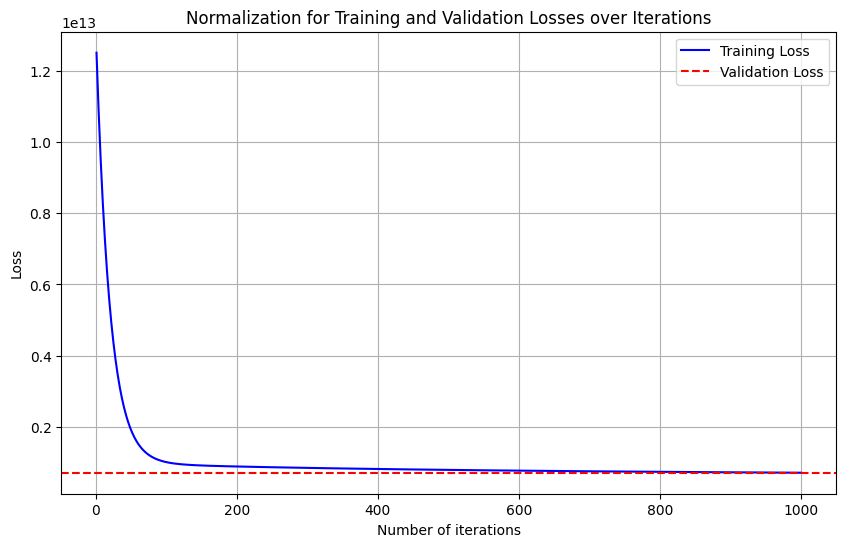

In [239]:
#plot loss over iteration graph
plt.plot(range(1, iterations10 + 1),cost_history10, color='blue', label='Training Loss')
plt.axhline(y=val_loss10, color='red', linestyle='--', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Normalization for Training and Validation Losses over Iterations')
plt.legend()

In [736]:
# Splitting the dataset into the Training set and Validation set
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size = 0.65, random_state = 0)

In [737]:
# Feature Scaling
sc10 = StandardScaler()
X_train10 = sc10.fit_transform(X_train10)
X_test10 = sc10.transform(X_test10)

In [738]:
# Fitting Logistic Regression to the Training set
classifier10 = LogisticRegression(random_state = 0)
classifier10.fit(X_train10, y_train10)

LogisticRegression(random_state=0)

In [739]:
# Predicting the Test set results
y_pred10 = classifier10.predict(X_test10)

In [740]:
print('Training Accuracy:', classifier10.score(X_train10,y_train10))
print('Test Accuracy:', classifier10.score(X_test10,y_test10))

Training Accuracy: 0.5684210526315789
Test Accuracy: 0.02535211267605634


# 3b standardization

In [243]:
#Variable for Standardization
X11 = data_std2.loc[:,['X0','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y11 = data.price
theta11 = np.zeros(12)
iterations11 = 1000;
alpha11 = 0.01;

# Gradient_decsent function
Xarray11 = X11.loc[:,['X0','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
yarray11 = y11.values
thetaNew11, cost_history11 = gradientDescent(Xarray11, yarray11, theta11, alpha11, iterations11,.1)
print('Value of theta =', thetaNew11)

# Linear model
print("Linear model:")
print("y_bar =", thetaNew11[0], "+", thetaNew11[1], "* area +", thetaNew11[2], "* bedrooms +", thetaNew11[3], "* bathrooms +", thetaNew11[4], "* stories +", thetaNew11[5], "* mainroad +", thetaNew11[6], "* guestroom", thetaNew11[7], "* basement +", thetaNew11[8], "* hotwaterheating +", thetaNew11[9], "* airconditioning +", thetaNew11[10], "* parking +", thetaNew11[11], "* prefarea")

val_predictions11 = Xarray11.dot(thetaNew11)
val_errors11 = np.subtract(val_predictions11, yarray11)
val_sqrErrors11 = np.square(val_errors11)
val_loss11 = 1 / (2 * len(Xarray11)) * np.sum(val_sqrErrors11)

Value of theta = [4766523.46205873  537522.78741371   96439.6650074   505418.16339709
  394634.95141545  163347.54671757  122259.22499416  180945.78718264
  188030.36531262  410010.6066268   257244.81995377  279328.50913662]
Linear model:
y_bar = 4766523.46205873 + 537522.7874137135 * area + 96439.66500740188 * bedrooms + 505418.16339709295 * bathrooms + 394634.95141544734 * stories + 163347.5467175671 * mainroad + 122259.22499415578 * guestroom 180945.7871826394 * basement + 188030.36531261902 * hotwaterheating + 410010.6066268014 * airconditioning + 257244.81995376985 * parking + 279328.5091366232 * prefarea


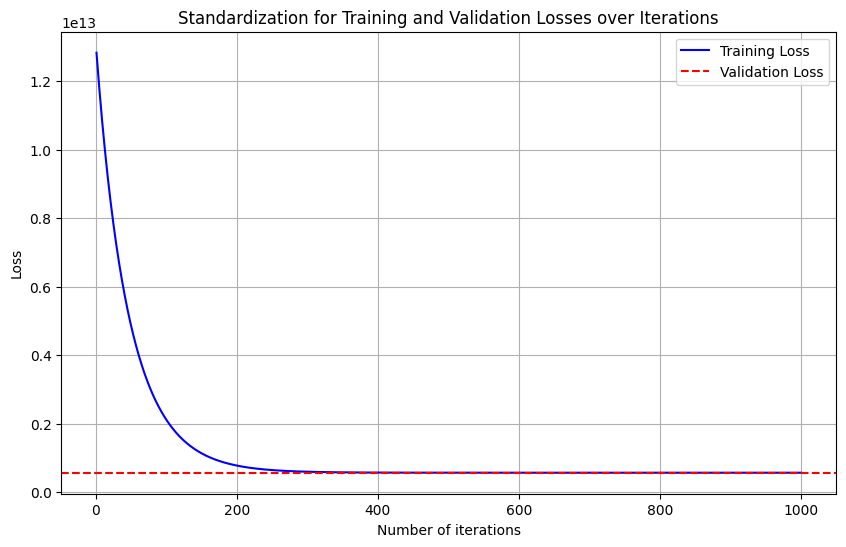

In [244]:
#plot loss over iteration graph
plt.plot(range(1, iterations11 + 1),cost_history11, color='blue', label='Training Loss')
plt.axhline(y=val_loss11, color='red', linestyle='--', label='Validation Loss')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Standardization for Training and Validation Losses over Iterations')
plt.legend()

In [741]:
# Splitting the dataset into the Training set and Validation set
X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y11, test_size = 0.65, random_state = 0)

In [742]:
# Feature Scaling
sc11 = StandardScaler()
X_train11 = sc11.fit_transform(X_train11)
X_test11 = sc11.transform(X_test11)

In [743]:
# Fitting Logistic Regression to the Training set
classifier11 = LogisticRegression(random_state = 0)
classifier11.fit(X_train11, y_train11)

LogisticRegression(random_state=0)

In [744]:
# Predicting the Test set results
y_pred11 = classifier11.predict(X_test11)

In [745]:
print('Training Accuracy:', classifier11.score(X_train11,y_train11))
print('Test Accuracy:', classifier11.score(X_test11,y_test11))

Training Accuracy: 0.5684210526315789
Test Accuracy: 0.02535211267605634


# 3b Summary
Both normalizationa and standardization graphs are different from each other. In normalization, as the iterations increase the loss instantly drops and it slowly levels off at about 1000 iterations. For standardization, the graph slowly decrease and at 400 iterations it starts to level and constantly stays the same. Its almost the same as 2b where it did the same path where one instantly decreases and continually stays the same. The other slowly decrease to start leveling off.
